In [1]:
import warnings
warnings.filterwarnings(action='ignore')
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import sys
from konlpy.tag import Okt
from collections import Counter
from wordcloud import WordCloud

# 한글 폰트 사용을 위해서 세팅
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/MALGUNSL.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

In [2]:
def df_str(df):
    #전체 리뷰들을 하나의 문자열로 만듦
    s = [s for s in df]
    document = ""
    for i in range(len(s)):
        document += s[i] # 대입연산자 document = document+s[i]와 같은 의미이고 이렇게 코딩해도 됩니다. 
    return document #데이터프레임의 원소들을 잘게 쪼개어 문자열(리스트)로 만들어주는 역할을 합니다. 

def get_noun(document):# document에는 문자열 리스트라면 뭐든지 들어갈 수 있습니다.
    # okt tagger를 이용해 명사 추출
    okt = Okt() # Okt()클래스를 인스턴스 한 것인데요 이건 개발쪽 지식에 가까우니 그냥 넘어가셔도 됩니다.
    noun = okt.nouns(document) #nouns()는 문자열에서 명사인 것들만 추려오는 역할을 하는 함수입니다. 
    for i in enumerate(noun):#enumerate는 데이터의 집합체(컬렉션)로부터 값을 읽어오는 기능을 하는 함수입니다. 
        if len(i)<2:
            noun.pop(i)
    count = Counter(noun)
    noun_list = count.most_common(100)#빈도수가 높은 100개의 단어를 가져오라는 뜻이에요

    return noun_list

def wordcloud(noun_list, title):
    # 워드클라우드 이미지 생성
    wc= WordCloud(
        font_path = 'C:\WINDOWS\FONTS\MALGUNSL.TTF',    # 한글폰트 경로 설정
        background_color='white',                             # 배경 색깔 정하기
        colormap = 'Dark2',                                # 폰트 색깔 정하기
        width = 800,
        height = 800).generate_from_frequencies(dict(noun_list)) 
    
    plt.figure(figsize=(10,10)) #이미지 사이즈 지정
    plt.suptitle("Word Cloud", fontsize=40)
    plt.title(title, fontsize=20)
    plt.imshow(wc, interpolation='lanczos') #이미지의 부드럽기 정도
    plt.axis('off') #x y 축 숫자 제거
    plt.show()  # 워드클라우드 이미지 확인
    
    return wc

In [6]:
def m_p_wc(dd):
    di = df_str(dd)
    mask_pos = (dd.label == 1)
    mask_neg = (dd.label == 0)
    df_total = dd.review.copy()
    df_pos = dd.loc[mask_pos,:].review # 긍정 리뷰에만 해당하는 데이터
    df_neg = dd.loc[mask_neg,:].review # 부정 리뷰에만 해당하는 데이터
    noun_list = get_noun(di)
    document_p = df_str(df_pos) # 부정 리뷰 데이터프레임을 하나의 큰 문자열로 만듭니다.
    noun_list_p = get_noun(document_p) # 명사만을 추출하고 빈도수를 계산합니다.
    document_n = df_str(df_neg) # 부정 리뷰 데이터프레임을 하나의 큰 문자열로 만듭니다.
    noun_list_n = get_noun(document_n) # 명사만을 추출하고 빈도수를 계산합니다.
    neg = list(dict(noun_list_n).keys()) # key(명사) 만을 이용해 리스트 생성
    pos = list(dict(noun_list_p).keys())
    drop_words = [w for w in neg if w in pos] # 부정리뷰에 포함된 명사가 긍정리뷰에도 등장할 경우 drop_words라는 리스트에 저장
    noun_list_p_filter = [x for x in noun_list_p if x[0] not in drop_words] # drop_words 리스트에 포함되지 않은 긍정리뷰 명사를 저장
    
    positive_reviews_filtered = wordcloud(noun_list_p_filter, '긍정 리뷰 (필터링 됨)')
        
    return positive_reviews_filtered

def m_n_wc(dd):
    di = df_str(dd)
    mask_pos = (dd.label == 1)
    mask_neg = (dd.label == 0)
    df_total = dd.review.copy()
    df_pos = dd.loc[mask_pos,:].review # 긍정 리뷰에만 해당하는 데이터
    df_neg = dd.loc[mask_neg,:].review # 부정 리뷰에만 해당하는 데이터
    noun_list = get_noun(di)
    document_p = df_str(df_pos) # 부정 리뷰 데이터프레임을 하나의 큰 문자열로 만듭니다.
    noun_list_p = get_noun(document_p) # 명사만을 추출하고 빈도수를 계산합니다.
    document_n = df_str(df_neg) # 부정 리뷰 데이터프레임을 하나의 큰 문자열로 만듭니다.
    noun_list_n = get_noun(document_n) # 명사만을 추출하고 빈도수를 계산합니다.
    neg = list(dict(noun_list_n).keys()) # key(명사) 만을 이용해 리스트 생성
    pos = list(dict(noun_list_p).keys())
    drop_words = [w for w in neg if w in pos] # 부정리뷰에 포함된 명사가 긍정리뷰에도 등장할 경우 drop_words라는 리스트에 저장
    noun_list_n_filter = [x for x in noun_list_n if x[0] not in drop_words] # drop_words 리스트에 포함되지 않은 부정리뷰 명사를 저장
    
    negative_reviews_filtered = wordcloud(noun_list_n_filter, '부정 리뷰(필터링 됨)')
    
    return negative_reviews_filtered

In [7]:
data_1 = pd.read_csv('./data/DUNE_label.csv')

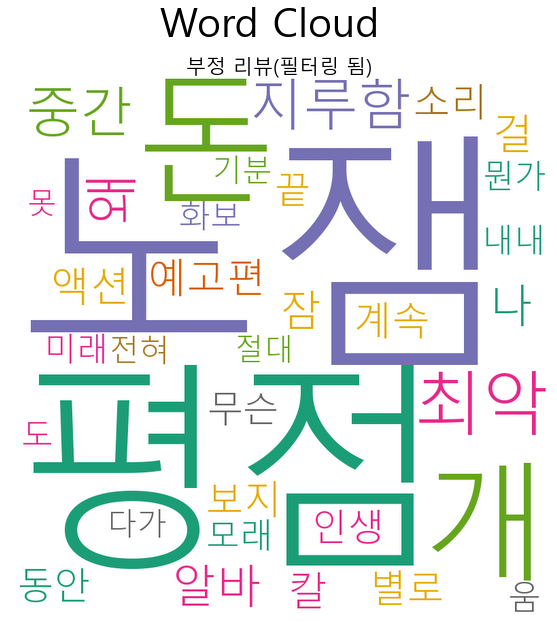

In [8]:
m_n_wc(data_1)

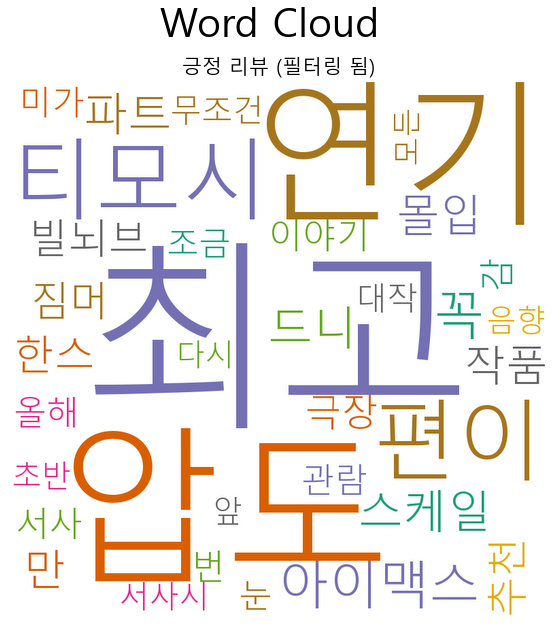

In [9]:
m_p_wc(data_1)

In [15]:
df_i = pd.read_csv('./data/data_main_insidedout.csv')
dfs = pd.read_csv('./data/crawling_kingsman__final_label.csv')

In [26]:
df_i

,point,review,label
0,10,기쁨이의 머리색이 파란색인 이유,1
1,10,슬픔은 참 역설적이다. 슬퍼야만 슬픔을 극복할 수 있다는 것이.,1
2,10,나의 어렸을적 상상의 친구는 누구였을까 .. 빙봉ㅜㅜ,1
3,9,우리는 '성숙' 이라는 단어로 얼마나 많은 슬픔이들을 가둬왔을까,1
4,10,픽사다운 영화. 아동만 보는 애니메이션이 아닌 전세대 통틀어 볼수있다는 애니이자 느...,1
...,...,...,...
9886,10,감동적이고 재미있어요 ^^,1
9887,9,감정들이 각각의 성격으로 한사람의 자아를 형성해준다는 상상력이 재미있었다 게임같은 ...,1
9888,7,아이들과 함께 볼수 있는 조은영화였습니다,1
9889,8,아이들때문에 보았는데 잼있게봤네요.,1


In [27]:
dfs

,point,review,label
0,10,젠틀하고 매너있게 약빨은 영화 ㅋㅋㅋㅋ,1
1,10,딱 정의해줄게. 콜린퍼스.우산.수트.액션.성공적,1
2,10,2편 무조건 나와라 제발,1
3,10,하... 말이 안나온다 ㅋㅋㅋ 진짜 매튜본은 천재인가바 콜린퍼스 왤케 섹시함? ㅠ,1
4,9,재미있음..기대이상..특히 마지막 장면이 압권!,1
...,...,...,...
9838,3,Not so bad But also not so good,0
9839,9,흥미진진하네요^^ 근래본 영화중에서 ㅋ,1
9840,10,또보고싶다!설명이필요한가요 ㅋ,1
9841,10,진심...인생영화....강츄..,1


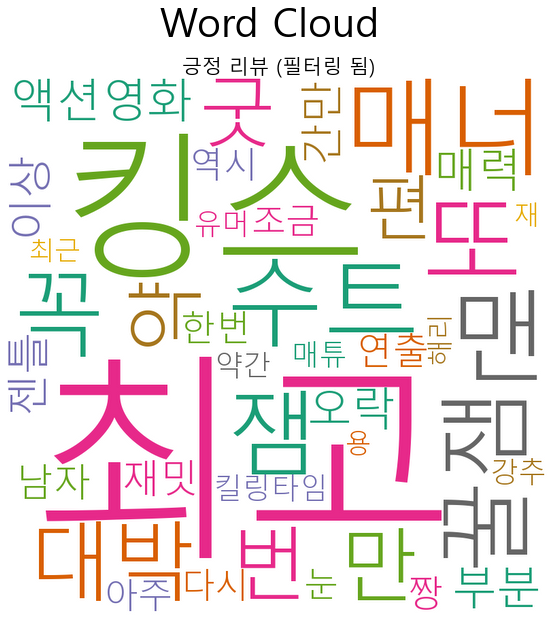

In [16]:
m_p_wc(dfs)

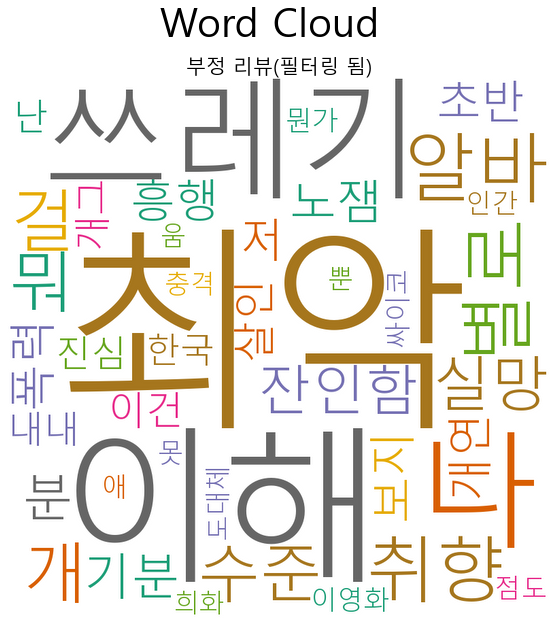

In [17]:
m_n_wc(dfs)

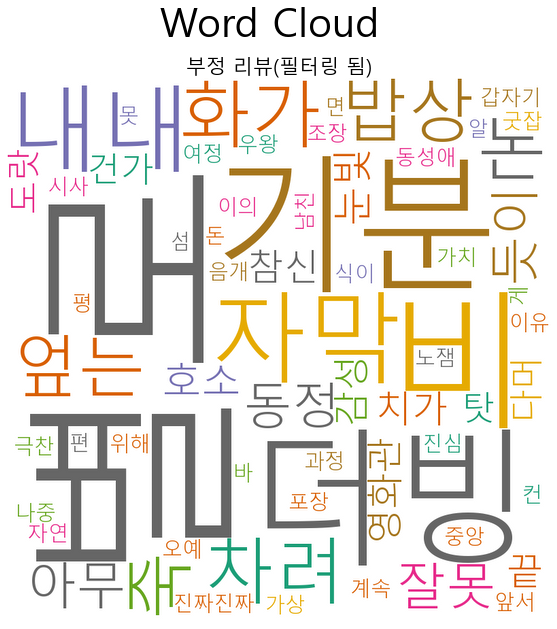

In [18]:
m_n_wc(df_i)

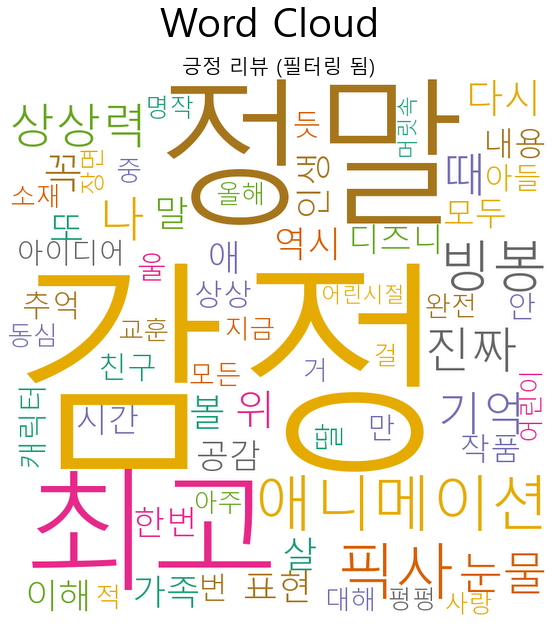

In [19]:
m_p_wc(df_i)